In [ ]:
# ! pip install librosa
# ! pip install soundfile

In [ ]:
import librosa
import librosa.display as librosa_display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

import IPython

### Применения

- Классификация аудио
- Распознование речи
- Удаление шума/улучшение качества аудио
- Получение информации о аудио (классификация музыкальных инструментов, классификация "настроения")
- Синтез речи, музыки
- И прочее...

### Звук и его представления

Звук происходит из-за вибраций различных объектов. 
Эти вибрации заставляют молекулы воздуха осцилировать и собрираться в группы. 
Именно этот процесс изменяет плотноть молекул в воздухе (изменение воздушного давления) пораждая звуковые волны

###  Представление звука в ЭВМ

Звуковой файл на любом вычислительном устройстве это список/списки из чисел. У каждого аудио-файла есть следующие "метапараметры":

- Количество каналов. Например: моно или стерео.  
- Чистота дискретизации (sample rate). Посколько звук это непрерывная величина, то для его представления в памяти обычно выбирают значения через определенный одинаковый промежуток. Sample rate говорит о том, сколько значений будет получено при записи звука длиной в одну секунду. 

Формула синусоидального сигнала:

$$y(t) = A \cdot sin(2\pi f t + \phi)$$

, где $f$ - частота, $\phi$ - фаза, сдвиг

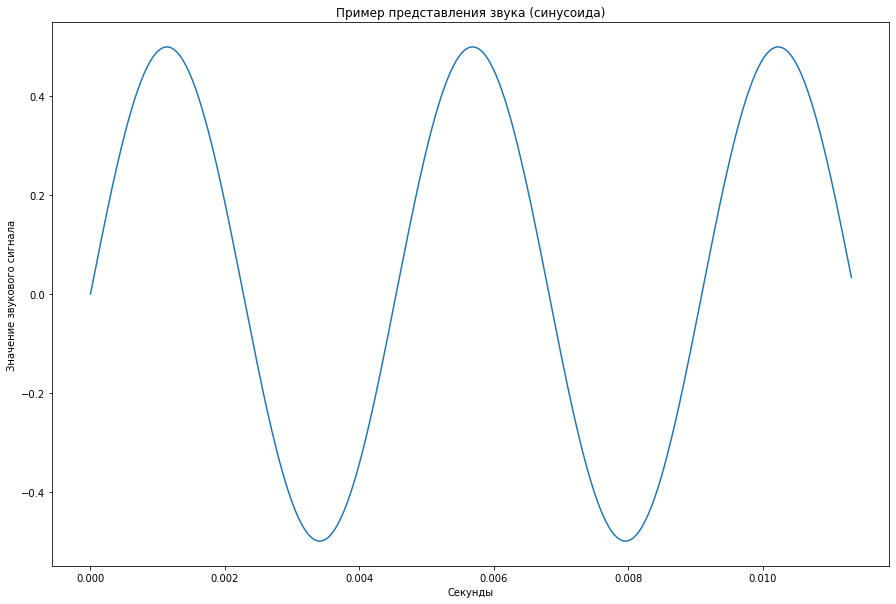

In [ ]:
SAMPLE_RATE = 44100
FREQUENCY = 220  # Частота сигнала
SECONDS = 2  # Насколько длинный сигнал мы хотим сгенерировать

A = 0.5
PHASE = 0

timeline = np.linspace(0, SECONDS, SAMPLE_RATE * SECONDS)
data = A * np.sin(FREQUENCY * 2 * np.pi * timeline + PHASE)

plt.figure(figsize=(15, 10))
plt.plot(timeline[:500], data[:500])
plt.title('Пример представления звука (синусоида)')
plt.xlabel('Секунды')
plt.ylabel('Значение звукового сигнала')
plt.show()

In [ ]:
sf.write('example_1.wav', data, SAMPLE_RATE, 'PCM_24')
IPython.display.Audio('example_1.wav')

Что будет происходить с сигналом при следующих изменениях?

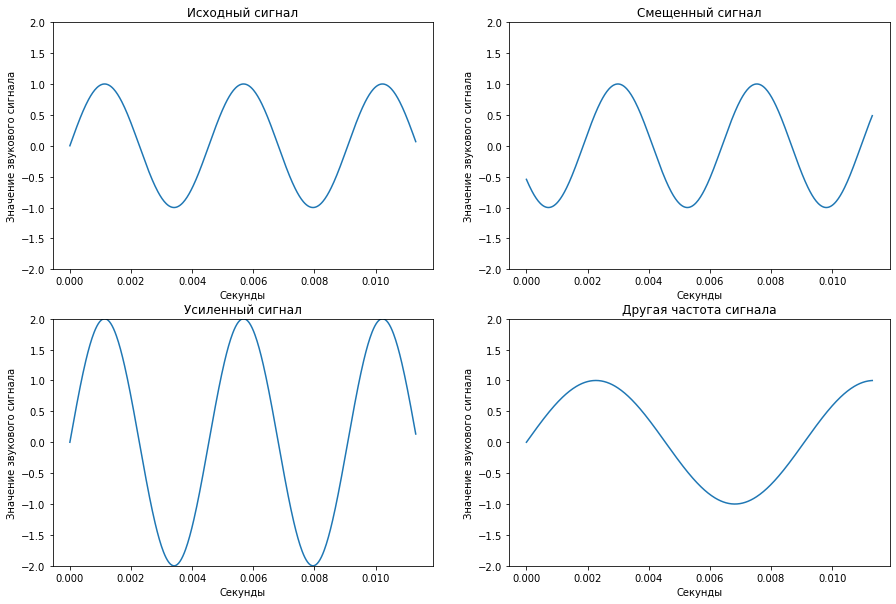

In [ ]:
SAMPLE_RATE = 44100
FREQUENCY = 220
SECONDS = 2

A = 2
PHASE = 10

timeline = np.linspace(0, SECONDS, SAMPLE_RATE * SECONDS)

data_0 = np.sin(FREQUENCY * 2 * np.pi * timeline)
data_1 = np.sin(FREQUENCY * 2 * np.pi * timeline + PHASE)
data_2 = A * np.sin(FREQUENCY * 2 * np.pi * timeline)
data_3 = np.sin(FREQUENCY * np.pi * timeline)

all_data = [
    (data_0, 'Исходный сигнал'),
    (data_1, 'Смещенный сигнал'),
    (data_2, 'Усиленный сигнал'),
    (data_3, 'Другая частота сигнала')
]

plt.figure(figsize=(15, 10))
for idx, (data, name) in enumerate(all_data):
    plt.subplot(2, 2, idx + 1)
    plt.title(name)
    plt.plot(timeline[:500], data[:500])
    plt.xlabel('Секунды')
    plt.ylabel('Значение звукового сигнала')
    plt.ylim(-2, 2)

#### Важное замечание: Чем выше частота, тем выше звук мы воспринимаем!

In [ ]:
# Пример
SAMPLE_RATE = 44100
SECONDS = 2

def create_waveform(freq, file_name):
    timeline = np.linspace(0, SECONDS, SAMPLE_RATE * SECONDS)
    data = np.sin(freq * 2 * np.pi * timeline)
    sf.write(file_name, data, SAMPLE_RATE, 'PCM_24')

In [ ]:
create_waveform(440, '440hz_example.wav')
IPython.display.Audio('440hz_example.wav')

In [ ]:
create_waveform(220, '220hz_example.wav')
IPython.display.Audio('220hz_example.wav')

Также важно отметить, что две различные частоты воспринимаются нами одинаково если одни различаются менее чем на наименьшую ближайшую степень двойки

(Можете сами это проверить используя функцию выше)

### Диапазон воспринимаемых частот

Для работы со звуком также полезно помнить о том, в каком диапазоне воспринимают звук различные существа. Ниже приведён список для некоторых из них:

- **Человек: 20 - 20,000 hz**
- Слон: 14 - 12,000 hz
- Кот: 48 - 75,000 hz
- Собака: 64 - 45,000 hz
- Мышь: 1,000 - 70,000 hz
- **Летучая мышь: 7,000 - 200,000 hz**

В этом списке как раз кроется ответ, почему все современные аудионосители используют `sample rate` равным 44100 или 4800

Ответ кроется в термине под названием **Частота Найквиста**. Который даёт верхнюю границу на частоту, которая может быть закодирована с использованием какого-либо `sample rate` без серьезных артефактов.

$$f_k = \frac{SR}{2}$$

Для 44,100 получаем 22,050, что чуть больше чем 20,000

На практике, очень не рекоммендуется использовать частоты, которые превышают частоту Найквиста, так как преобразования, направленные на работу с аудио будут показывать некорректное поведедение (Aliasing problem, слияние различных частот в некорректную)

### Как высчитать размер аудиофайла

Из рассказанного ранее можно понять, что размер аудио-файла зависит от `sample rate`, но так же важно упомянуть что мы должны кодировать амплитуду сигнала. Обычно для каждого такого измерения используется 16 бит (Bit depth), что позволяет получить количество различных значений равным $2^{16} = 65536$.

Подытожим. Если мы хотим создать аудиофайл продолжилельностью в 1 миниту, с частотой дискретизации равной 48,000 и c Bit depth равным 16 нам необходимо:

$$16 \cdot 48000 \cdot 60$$ бит, или же $$\frac{16 \cdot 48000 \cdot 60}{2^3 \cdot 2^{20}} \approx 5.5$$ мегабайт

Тут мы не учитывали количество каналов и считали что мы записываем только 1 канал (моно)

## Признаковое описание аудио семплов

Мы уже довольно много узнали про устройство аудио, но какие признаки могут быть у каждого такого объекта?

Если работать с сырым аудио файлом как с признаковым описанием, то мы можем в какой-то момент столкнуться с проблемой, когда у аудио-файлов разной длины разная размерность признакового описания, что ни есть хорошо. В связи с этим нам необходимо разработать более робастные инструменты признакового представления для аудио

В последнее время используются только 3 основных пространства для формирования признаков для аудио:

- Time domain 
- Frequency domain (Fourier Transform)
- Time-frequency domain (Short Term Fourier Transform)

#### Time domain

Как и следует из названия признаки из этой группы извлекают данные напрямую из аудио-сигнала. Здесь, мы работаем в пространстве "Время - Амплитуда"

Если вы помните лекцию про временные ряды, то можно использовать подходы из неё для вычисления базовых статистик или же информации и цикличности или сезонности аудио-ряда

#### Frequency domain

Для этих признаков характерен переход из пространства "Время - Амплитуда" в пространтво "Частота - Сила (Magnitude)". Самый очевидный пример такого признака это преобразование Фурье, которое переводит аудио-файл в в частотное простанство, с которым уже можно работать как с признаковым описанием. Однако, самый важный недостаток такого подхода заключается в том, что мы полностью избавляемся от привязки ко времени, что делает недоступным для нас анализ определённой части аудио-сигнала. К счастью, существует способ решить эту проблему и он заключается в переходе к `Time-frequency domain` признакам

###### Преобразование Фурье

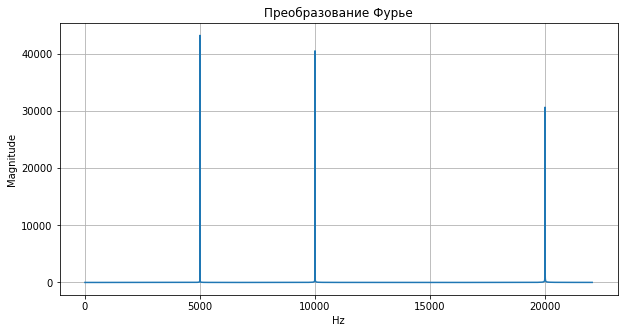

In [ ]:
from scipy.fft import fft, fftfreq

create_waveform(20000, 'stft_20kHz_sample.wav')
create_waveform(10000, 'stft_10kHz_sample.wav')
create_waveform(5000, 'stft_5kHz_sample.wav')

sample_20000, sr = librosa.load('stft_20kHz_sample.wav', sr=44100)
sample_10000, sr = librosa.load('stft_10kHz_sample.wav', sr=44100)
sample_5000, sr = librosa.load('stft_5kHz_sample.wav', sr=44100)

combined_sample = sample_20000 + sample_10000 + sample_5000

N = combined_sample.shape[0]

yf = fft(combined_sample)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10, 5))
plt.title('Преобразование Фурье')
plt.plot(xf[:N // 2], np.abs(yf)[:N // 2])
plt.ylabel('Magnitude')
plt.xlabel('Hz')
plt.grid(True)
plt.show()

Заметим, что при увеличении частоты, значение сила сигнала уменьшается

#### Time-frequency domain

Примерами таких признаков могут служить:

- Спектрограммы
- Спектрограммы Мела
- MFCC (Mel Frequency Cepstral Coefficients)
- Constant Q-transform (Продвинутая тема, не будет рассмотрена в лекции)

#### Спектрограммы

Спектрограммы - самое очевидное решение проблемы потери информации о времени при переходе во Frequency domain. 

Решение заключается в формировании тепловой карты путем применения преобразования Фурье не ко всему аудио-фрагменту, а к его частям с последующим сдвигом. На выходе получается матрица со значениями, для которой оси зачастую расположены следующим образом:

- Ось Х - время
- Ось Y - частота
- Ось Z (Цвет) - магнитуда

Самые важные параметры для создания спектрограмм:

- `n_fft` - величина окна
- `hop_length` - величина сдвига
- `sr` - частота дискретизации

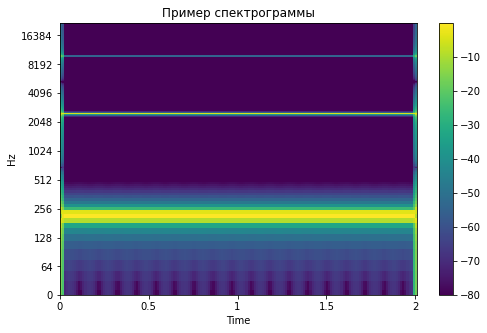

In [ ]:
# Пример получения спектрограммы для комбинации трёх сигналов

create_waveform(10000, 'stft_10kHz_sample.wav')
create_waveform(2500, 'stft_2500_sample.wav')
create_waveform(220, 'stft_220_sample.wav')

sample_10000, sr = librosa.load('stft_10kHz_sample.wav', sr=44100)
sample_2500, sr = librosa.load('stft_2500_sample.wav', sr=44100)
sample_220, sr = librosa.load('stft_220_sample.wav', sr=44100)

combined_sample = sample_10000 + sample_2500 + sample_220

stft = librosa.stft(combined_sample)
sample_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

plt.figure(figsize=(8, 5))
plt.title('Пример спектрограммы')
librosa.display.specshow(sample_db, y_axis='log', x_axis='time', sr=sr, cmap='viridis')
plt.colorbar();

На графике выше вы можете видеть три полосы, которые соответствуют выбранным частотам

**Важно! Так как спектрограмма не является изображением, а всего лишь тепловой картой (heatmap), категорически не приветствуется сохранять её через `plt.savefig` для дальнейшей работы с ней**

Вот пример почему это плохо. Сейчас будут показаны две спектрограммы но в разных цветовых гаммах

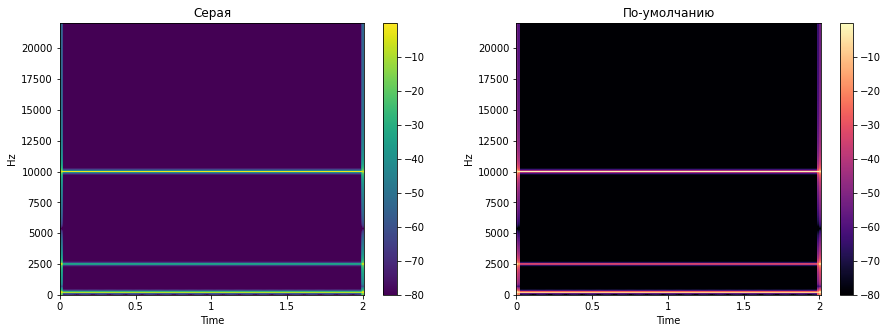

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Серая')
librosa.display.specshow(sample_db, y_axis='hz', x_axis='time', sr=sr, cmap='viridis')
plt.colorbar()

plt.subplot(122)
plt.title('По-умолчанию')
librosa.display.specshow(sample_db, y_axis='hz', x_axis='time', sr=sr)
plt.colorbar();

#### Если все же хотите сохранить именно саму спектрограмму, то лучше это делать через библиотеку `pickle`

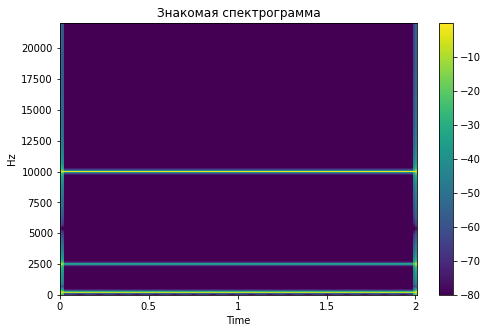

In [ ]:
import pickle

with open('save_spec.pkl', 'wb') as file:
    pickle.dump(sample_db, file)

with open('save_spec.pkl', 'rb') as file:
    saved_spec = pickle.load(file)

    
plt.figure(figsize=(8, 5))
plt.title('Знакомая спектрограмма')
librosa.display.specshow(saved_spec, y_axis='hz', x_axis='time', sr=sr, cmap='viridis')
plt.colorbar();

### Спектрограммы Мела

Как мы узнали из первой части лекции, мы воспринимаем изменение частот в логарифмической шкале "Также важно отметить, что две различные частоты воспринимаются нами одинаково если одни различаются менее чем на наименьшую ближайшую степень двойки". В связи с этим, очень хотелось бы учитывать это в формировании тепловой карты. Для этого была разработана специальная тепловая карта, учитывающая такую особенность (Спектрограмма Мела)

Примерная формула восприятия частот (Mel scale):


$$M = 1125 \cdot \ln{\left(1 + \frac{f}{700}\right)}$$

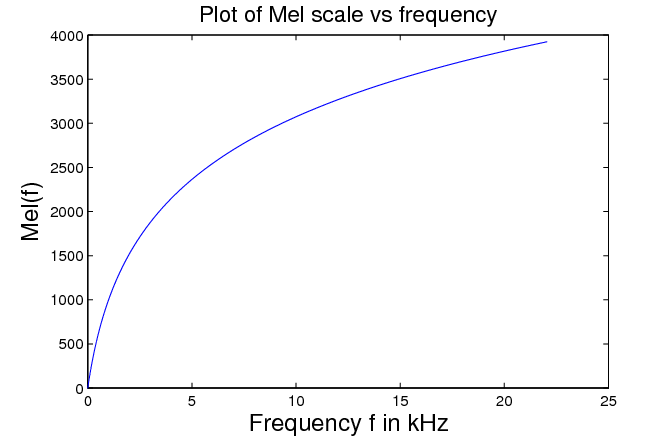

In [ ]:
IPython.display.Image('Mel_scale_example.png')

Взглянем не спектрограмму мела и сравним её с обычной

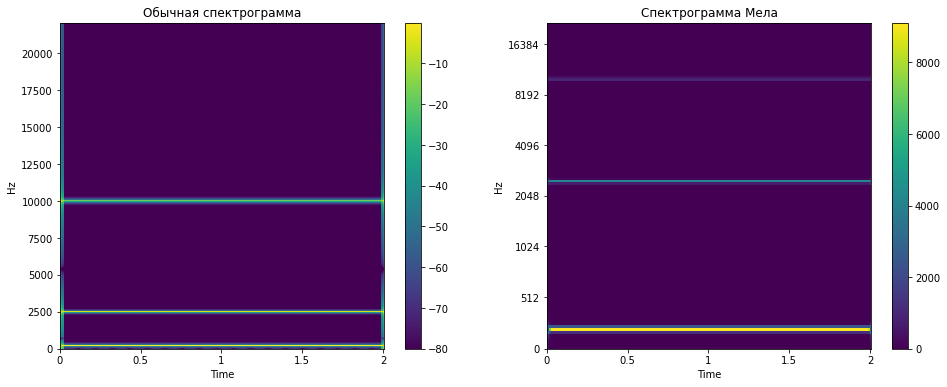

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.title('Обычная спектрограмма')
librosa.display.specshow(saved_spec, y_axis='hz', x_axis='time', sr=SAMPLE_RATE, cmap='viridis')
plt.colorbar()

plt.subplot(122)
plt.title('Спектрограмма Мела')

combined_sample = sample_10000 + sample_2500 + sample_220
mel_spec = librosa.feature.melspectrogram(combined_sample, sr=SAMPLE_RATE)
librosa.display.specshow(mel_spec, y_axis='mel', x_axis='time', sr=SAMPLE_RATE, cmap='viridis');
plt.colorbar();

Как видно из примера, в случае спектрограмм Мела мы больше уделяем внимания более низким частотам (частота в 10 килогерц была почти не распознана в случае Мела)

#### MFCC (Mel Frequency Cepstral Coefficients)

MFCC довольно часто используются (по-факту являются стандартом) в создании признаков для распознования речи. Например, они используются для система, которые могут распознавать произнесенные цифры или простые фразы (по типу "Да", "Нет"). На их основе работают многие банковские боты (в приближении)

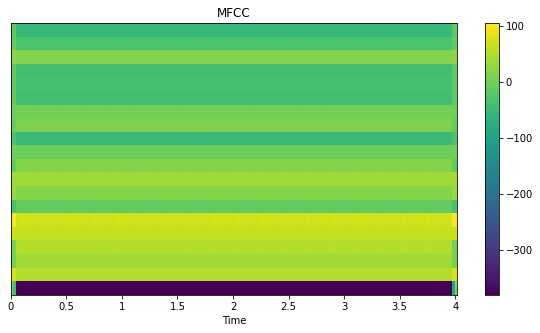

In [ ]:
# Получим MFCC из аудио

mfcc_features = librosa.feature.mfcc(combined_sample, sr=SAMPLE_RATE)
plt.figure(figsize=(10, 5))
plt.title('MFCC')
librosa.display.specshow(mfcc_features, x_axis='time', cmap='viridis')
plt.colorbar()
plt.plot();

**Важно отметить, что мы не можем никак обозначить ось Y, так как мы получаем нечто не имеющее размерности (коэффициенты)**

Также заметим, что их размерность (MFCC) куда меньше чем у спектрограмм

In [ ]:
mfcc_features.shape

(20, 173)

In [ ]:
saved_spec.shape

(1025, 173)

#### Как вычисляются MFCC, и чем они лучше предыдущих подходов?

1) Вычисляем спектрограммы Мела (формула предоставлена выше)

2) Берем логарифм он её (поэлементный)

3) Вычисляем Дискретное Косинусное Преобразование (Discrete Cosine Transform, DCT)

4) MFCC - полученные значения амплитуд от полученного спектра

Пример реализации MFCC вы можете найти по следующей ссылке:

https://www.kaggle.com/ilyamich/mfcc-implementation-and-tutorial

Если рассмотреть алгоритм выше, то можно увидеть, что основных различий между спектрограммами Мела и MFCC всего два:

- Дополнительный логарифм. Он выступает в роли нормирующего коэффициента (в некоторых реализациях его вообще не используют)
- DCT - линейное преобразование (может быть представлено или объединено с первым слоем нейронной сети)

Больше про speech representation можно прочитать в [презентации](http://people.csail.mit.edu/sshum/talks/ivector_tutorial_interspeech_27Aug2011.pdf) MIT Spoken Language System Group

## на примере речи 

In [ ]:
RU_SPEECH_FILE = 'volshebnik.wav'

IPython.display.Audio(RU_SPEECH_FILE)

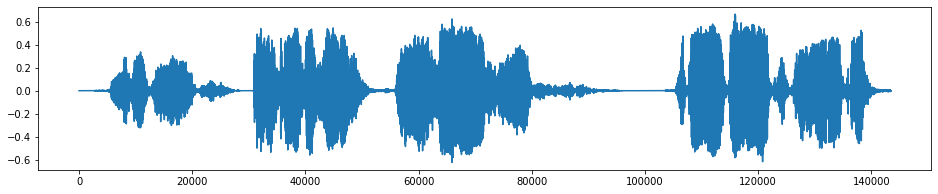

In [ ]:
# речь в виде звуковой волны
waveform, sample_rate = librosa.load(RU_SPEECH_FILE)

plt.figure(figsize=(16, 3))
plt.plot(waveform)
plt.show()

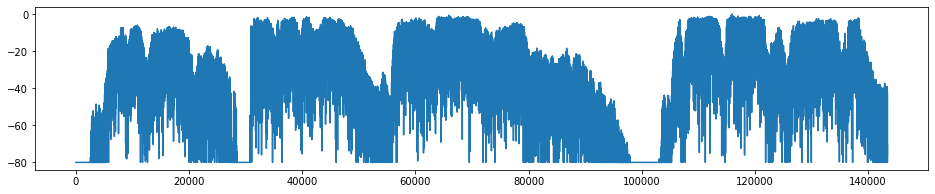

In [ ]:
# речь в виде децибел

db = librosa.amplitude_to_db(np.abs(waveform), ref=np.max)
plt.figure(figsize=(16, 3))
plt.plot(db)
plt.show()

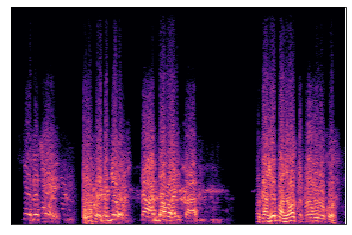

In [ ]:
# речь в виде децибел

D = librosa.stft(waveform)
db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(db)

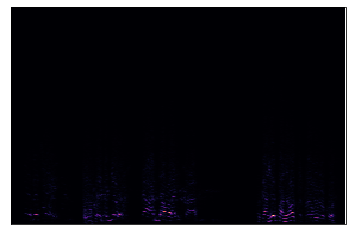

In [ ]:
# в виде stft
# ничего не видно. Логарифмируем

librosa.display.specshow(D)

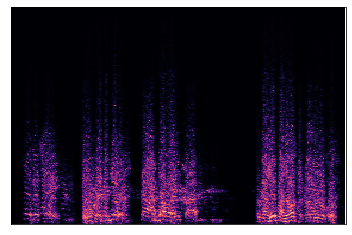

In [ ]:
# в виде log stft
# чаще всего это представление речи используют в моделях глубокого обучения

librosa.display.specshow(np.log1p(D))

# Примеры анализа данных

Одной из задач обработки аудио является диаризация - разделение говорящих на аудио. Попробуем решить её графически. Для этого нужно найти данные речи и предобученную модель для эмбеддинга голосов.

In [ ]:
!pip3 install torchaudio

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 2.4 MB 1.2 MB/s eta 0:00:01
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:
import torchaudio
import torch

In [ ]:
# mfcc transform
mel_transform = torchaudio.transforms.MFCC()
mel_transform

MFCC(
  (amplitude_to_DB): AmplitudeToDB()
  (MelSpectrogram): MelSpectrogram(
    (spectrogram): Spectrogram()
    (mel_scale): MelScale()
  )
)

torch.Size([40, 718])


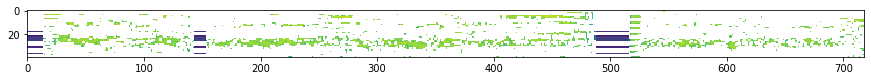

In [ ]:
mels = mfcc(torch.Tensor(waveform)).log2()
print(mels.size())

plt.figure(figsize=(15, 6))
plt.imshow(mels)

In [ ]:
mels.mean(dim=1).size()

torch.Size([40])

### свернём голоса в эмбеддинги

In [ ]:
import os
from pathlib import Path

# https://www.kaggle.com/wiradkp/minispeakerdiarization2

!tree data/

data/
└── mini_speaker_diarization
    └── train
        ├── anthropology_professor
        │   └── audio_1.wav
        ├── biology_professor
        │   └── audio_1.wav
        ├── customer
        │   └── audio_1.wav
        ├── literature_professor
        │   └── audio_1.wav
        ├── physics_professor
        │   └── audio_1.wav
        └── store_clerk
            └── audio_1.wav

8 directories, 6 files


In [ ]:
!rm -rf data/mini_speaker_diarization/train/.DS_Store

In [ ]:
# загрузим датасет небольших речей 6 разных спикеров

path = Path('data/mini_speaker_diarization/train/')

speechs = []
for filepath in os.listdir(path):
    path_ = path / filepath
    filename = os.listdir(path_)[0]
    
    print(f'loading {filepath}')
    
    wave, sample_rate = librosa.load(path_ / filename)
    speechs.append(torch.Tensor(wave))

loading physics_professor
loading store_clerk
loading anthropology_professor
loading biology_professor
loading literature_professor
loading customer


In [ ]:
# разметим пол
sex = ['M', 'M', 'F', 'M', 'F', 'F']

In [ ]:
# сделаем эмбеддинги с помощью мел-преобразования

def make_mels(audio: torch.Tensor) -> torch.Tensor:
    mels = mfcc(audio)
    mels = mels.mean(dim=1)
    return mels


mels = [make_mels(audio) for audio in speechs]
print([t.size() for t in mels])

[torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40])]


In [ ]:
import umap

embs = umap.UMAP().fit_transform(torch.stack(mels))

/usr/local/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


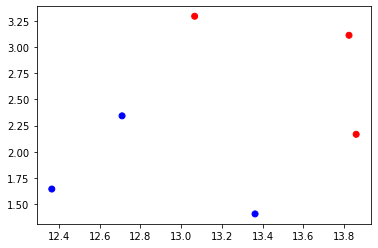

In [ ]:
# полученные с помощью мел-преобразования усредненные эмбеддинги разделяются по полу

colors = ['blue' if sex_i == 'M' else 'red' for sex_i in sex]

plt.scatter(embs[:, 0], embs[:, 1], color=colors)
plt.show()

## другие способы

для работы со стилем голоса часто подходят преобразования аудио. Они извлекают из голоса признаки. Для работы с контентом речи нужны более сложные модели

##### Что еще предстоит разобрать?

1) Аудио аугментации (https://www.kaggle.com/CVxTz/audio-data-augmentation)

2) Проекции в 2д эмбеддингов голоса: диаризация, биометрия